Clustering comparison between K-Means and DBSCAN

1) Perform K-Means clustering (use WCSS to help find best K value) on the given
dataset, display clustering results with graphical visualization, provide any necessary
comments and discussions.

2) Perform DBSCAN clustering (use knee locator to help find optimal parameter) on the
given dataset, display clustering results with graphical visualization, provide any
necessary comments and discussions.

3) Conduct comparison studies on the two techniques (K-Means and DBSCAN), with
graphical visualization comparisons, discuss your results and decide on whether:
a. K-Means is the better clustering technique for this dataset or,
b. DBSCAN is the better clustering technique for this dataset, or
c. There’s no clear distinction between the two techniques for this dataset

In [1]:
#1) Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
#2) Import dataset from pandas

dataset = pd.read_csv('C:/Users/User/Desktop/clustering.csv')
dataset

,Unnamed: 0,A,B
0,0,0.329241,0.841783
1,1,1.697407,-0.236075
2,2,-0.831460,0.584743
3,3,1.825271,-0.297894
4,4,1.236577,0.121528
...,...,...,...
295,295,1.691072,-0.105566
296,296,0.758118,-0.536704
297,297,0.881945,0.110503
298,298,0.169373,0.934682


In [5]:
#3) find info regarding dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   A           300 non-null    float64
 2   B           300 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


<AxesSubplot:>

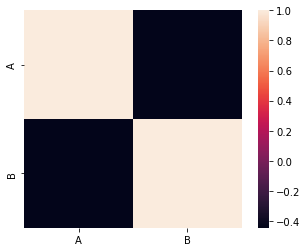

In [6]:
#4) calculating the correlation by using heatmap

dataset1 = dataset.iloc[:,[1,2]]
cor = dataset1.corr()

sns.heatmap(cor,square = True)

In [7]:
#5) Selecting two columns from dataset to make comparison (in this case column A and B)

X = dataset.iloc[:,[1,2]].values
X

array([[ 3.29241011e-01,  8.41782855e-01],
       [ 1.69740655e+00, -2.36074817e-01],
       [-8.31460366e-01,  5.84742953e-01],
       [ 1.82527087e+00, -2.97893946e-01],
       [ 1.23657742e+00,  1.21527895e-01],
       [ 2.00824135e+00,  2.10671842e-01],
       [-5.38606850e-02,  2.16853156e-01],
       [-8.09743116e-01,  5.86629643e-01],
       [ 9.78539571e-01, -5.34914353e-01],
       [ 3.33720395e-01, -3.42773155e-01],
       [-4.34990600e-03,  2.81660878e-01],
       [ 2.00072796e+00, -1.88565126e-01],
       [ 8.71723195e-01,  1.50505910e-02],
       [-9.35651680e-01,  4.33125522e-01],
       [ 1.30211340e-02,  1.07700409e-01],
       [-8.25963314e-01,  5.51208673e-01],
       [ 1.47345533e+00, -2.70576951e-01],
       [ 8.36300292e-01, -5.91937608e-01],
       [-6.03981600e-03,  9.88735343e-01],
       [ 1.99057307e+00,  1.72248831e-01],
       [ 1.06777960e+00,  9.54599280e-02],
       [ 3.48439248e-01, -2.65191295e-01],
       [ 1.44756071e-01,  9.29001055e-01],
       [ 9.

In [8]:
#6) Give standard scaler to standardize a feature by subtracting the mean and then scaling to unit variance

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled

array([[-0.19367631,  1.19707246],
       [ 1.35934632, -0.94233962],
       [-1.51120366,  0.68688054],
       [ 1.50448679, -1.06504283],
       [ 0.83625314, -0.23254316],
       [ 1.71217898, -0.05560362],
       [-0.62854007, -0.04333449],
       [-1.48655212,  0.69062538],
       [ 0.54335099, -1.53549856],
       [-0.1885917 , -1.15412242],
       [-0.57233973,  0.08530069],
       [ 1.70365043, -0.84803885],
       [ 0.42210233, -0.44388723],
       [-1.62947258,  0.38593899],
       [-0.55262164, -0.25998898],
       [-1.50496388,  0.62031921],
       [ 1.10513637, -1.01082203],
       [ 0.38189332, -1.64868256],
       [-0.57425797,  1.48875469],
       [ 1.69212349, -0.13186847],
       [ 0.64464852, -0.2842848 ],
       [-0.17188414, -1.00013217],
       [-0.40308758,  1.37018963],
       [ 0.47195018,  0.6674501 ],
       [-0.04455545,  1.28442231],
       [ 1.00641662, -1.62400292],
       [ 0.41258526,  0.85328116],
       [ 1.00260241, -1.63401717],
       [-1.77578325,

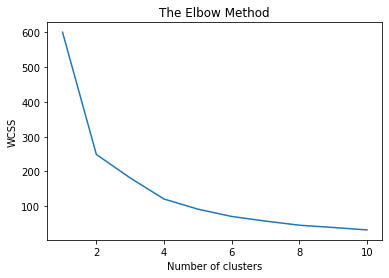

In [9]:
#KMEANS METHOD

#7) Elbow method is used to find KMeans. Calculate Within-Cluster Sum of Squares (WCSS) to find K.

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#8) Then calculate the KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 3, 2, 3, 3, 3, 2, 2, 0, 0, 2, 3, 0, 2, 2, 2, 3, 0, 1, 3, 3, 0,
       1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 3, 3, 2, 0, 1, 1, 0, 0, 1, 0,
       3, 1, 1, 2, 0, 1, 3, 2, 0, 2, 1, 0, 1, 3, 1, 3, 3, 1, 3, 0, 3, 3,
       3, 2, 3, 3, 3, 0, 2, 0, 1, 1, 2, 3, 1, 3, 0, 2, 1, 2, 0, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 2, 0, 3, 3, 2, 1, 0, 1, 0, 0, 2, 1, 3, 0, 1, 3,
       0, 1, 1, 1, 0, 1, 2, 1, 0, 3, 2, 2, 1, 0, 2, 3, 0, 0, 1, 1, 0, 3,
       3, 0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1, 3, 0, 0, 3, 1, 3, 1, 0, 3, 1,
       1, 3, 1, 1, 1, 0, 1, 1, 0, 3, 1, 1, 3, 3, 2, 2, 0, 0, 3, 3, 1, 2,
       2, 0, 3, 1, 1, 0, 1, 3, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1,
       2, 3, 1, 1, 0, 1, 3, 0, 0, 3, 2, 0, 3, 1, 2, 2, 3, 2, 1, 2, 2, 2,
       3, 0, 1, 2, 2, 2, 2, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 1, 1, 1, 0, 1,
       3, 1, 2, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 3, 2, 2, 3, 1,
       0, 1, 3, 3, 2, 0, 3, 0, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2,
       2, 1, 2, 2, 0, 2, 1, 0, 0, 3, 0, 3, 1, 3])

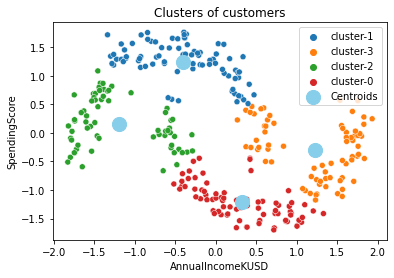

In [11]:
#9) Next, visualizing KMeans clustering by using scatter plot 

sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue = ["cluster-{}".format(x) for x in y_kmeans])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'skyblue', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('AnnualIncomeKUSD')
plt.ylabel('SpendingScore')
plt.legend()
plt.show()

In [12]:
#10) Calculate the silhouette score

score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(score)

0.4329118241119466


In [13]:
# DBSCAN METHOD

#1) Now calculate the DBSCAN method

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

import warnings
warnings.filterwarnings("ignore")

dataset=pd.read_csv('C:/Users/User/Desktop/clustering.csv')
dataset

,Unnamed: 0,A,B
0,0,0.329241,0.841783
1,1,1.697407,-0.236075
2,2,-0.831460,0.584743
3,3,1.825271,-0.297894
4,4,1.236577,0.121528
...,...,...,...
295,295,1.691072,-0.105566
296,296,0.758118,-0.536704
297,297,0.881945,0.110503
298,298,0.169373,0.934682


In [14]:
#2) Install kneed library

!pip install kneed

In [15]:
#3) Selecting two columns from dataset to make comparison (in this case column A and B)

X = dataset.iloc[:,[1,2]].values
X

array([[ 3.29241011e-01,  8.41782855e-01],
       [ 1.69740655e+00, -2.36074817e-01],
       [-8.31460366e-01,  5.84742953e-01],
       [ 1.82527087e+00, -2.97893946e-01],
       [ 1.23657742e+00,  1.21527895e-01],
       [ 2.00824135e+00,  2.10671842e-01],
       [-5.38606850e-02,  2.16853156e-01],
       [-8.09743116e-01,  5.86629643e-01],
       [ 9.78539571e-01, -5.34914353e-01],
       [ 3.33720395e-01, -3.42773155e-01],
       [-4.34990600e-03,  2.81660878e-01],
       [ 2.00072796e+00, -1.88565126e-01],
       [ 8.71723195e-01,  1.50505910e-02],
       [-9.35651680e-01,  4.33125522e-01],
       [ 1.30211340e-02,  1.07700409e-01],
       [-8.25963314e-01,  5.51208673e-01],
       [ 1.47345533e+00, -2.70576951e-01],
       [ 8.36300292e-01, -5.91937608e-01],
       [-6.03981600e-03,  9.88735343e-01],
       [ 1.99057307e+00,  1.72248831e-01],
       [ 1.06777960e+00,  9.54599280e-02],
       [ 3.48439248e-01, -2.65191295e-01],
       [ 1.44756071e-01,  9.29001055e-01],
       [ 9.

In [16]:
#4) Give standard scaler to standardize a feature by subtracting the mean and then scaling to unit variance

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled

array([[-0.19367631,  1.19707246],
       [ 1.35934632, -0.94233962],
       [-1.51120366,  0.68688054],
       [ 1.50448679, -1.06504283],
       [ 0.83625314, -0.23254316],
       [ 1.71217898, -0.05560362],
       [-0.62854007, -0.04333449],
       [-1.48655212,  0.69062538],
       [ 0.54335099, -1.53549856],
       [-0.1885917 , -1.15412242],
       [-0.57233973,  0.08530069],
       [ 1.70365043, -0.84803885],
       [ 0.42210233, -0.44388723],
       [-1.62947258,  0.38593899],
       [-0.55262164, -0.25998898],
       [-1.50496388,  0.62031921],
       [ 1.10513637, -1.01082203],
       [ 0.38189332, -1.64868256],
       [-0.57425797,  1.48875469],
       [ 1.69212349, -0.13186847],
       [ 0.64464852, -0.2842848 ],
       [-0.17188414, -1.00013217],
       [-0.40308758,  1.37018963],
       [ 0.47195018,  0.6674501 ],
       [-0.04455545,  1.28442231],
       [ 1.00641662, -1.62400292],
       [ 0.41258526,  0.85328116],
       [ 1.00260241, -1.63401717],
       [-1.77578325,

In [17]:
#5) Calculate the DB SCAN

db = DBSCAN(eps=0.5, min_samples=10).fit(X_scaled)
# Compute clusters from a data or distance matrix and predict labels.
clusters = db.fit_predict(X_scaled)

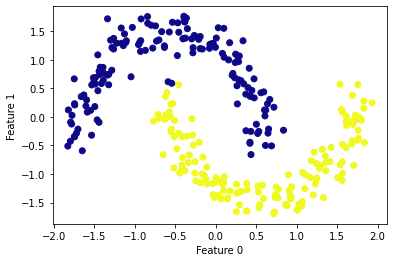

In [18]:
#6) Visualizing the DBSCAN clustering by using scatter plot

plt.scatter(X_scaled[:,0],X_scaled[:,1], c=clusters, cmap='plasma')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

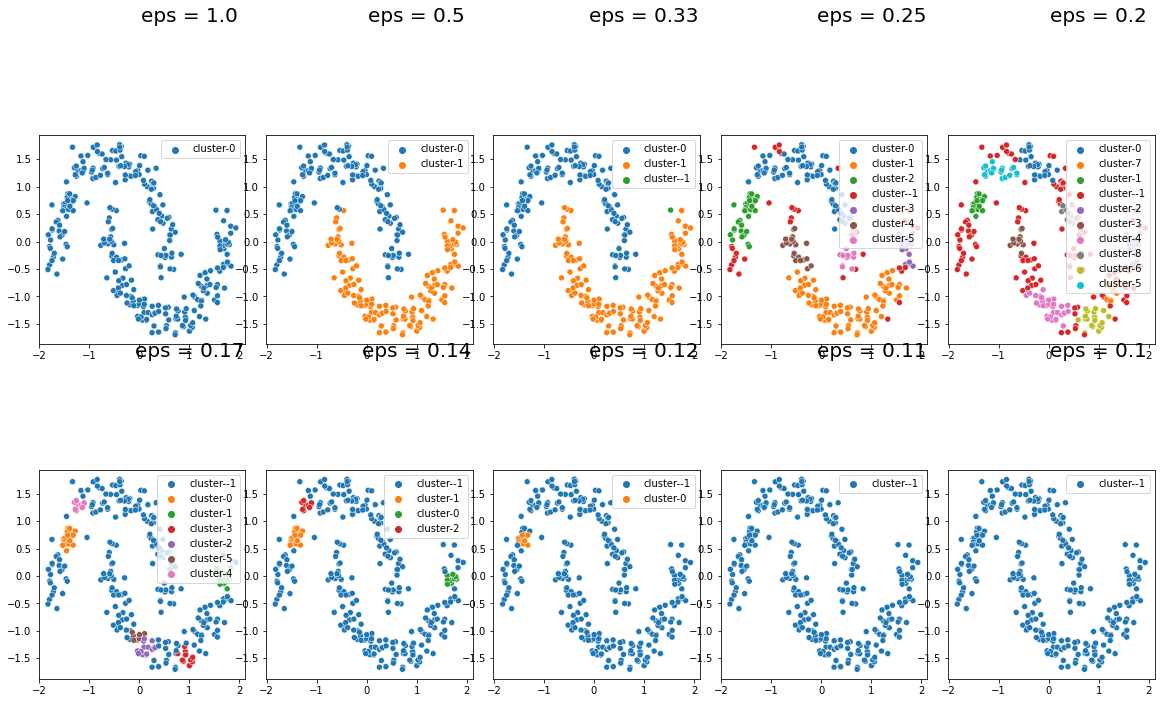

In [19]:
## ADDITIONAL NOTES: IF THE EPS IS VARY
## EPS IS A RADIUS OF NEIGHBORHOOD AROUND A DATA POINT

#7) Need to plot subplot based on eps

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.6, wspace=.1)
i = 1

for x in range(10, 0, -1):
    eps = 1/(11-x)
    # Fit the examples
    db = DBSCAN(eps=eps, min_samples=10).fit(X_scaled)
    # Define a mask
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    # The indices of core samples are in core_sample_indices
    core_samples_mask[db.core_sample_indices_] = True
    # labels
    clusters = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=20, ha="center")
    # Plot the points based on the labels
    sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=["cluster-{}".format(x) for x in clusters])
    i += 1

In [20]:
#8) Knee Locater is used for DBSCAN. KNearest Neighbors algorithm is being used to detect knee locater

nearest_neighbors = NearestNeighbors(n_neighbors = 11)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors (X_scaled)

#Why 11?
#•The min samples for DBSCAN is 10
#•We want to find the “just right” 𝜀parameter in the distancesof 11 th furthest neighbor of each point
#•Can be found using knee locator
#•This just right parameter is called knee

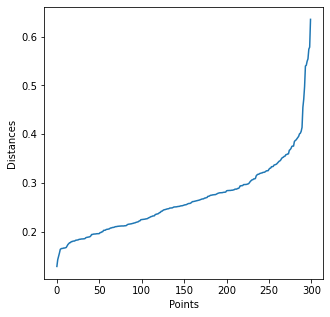

In [21]:
#9) Find knee locator by using scatter plot

distances = np.sort (distances[:,10],axis=0)
i = np.arange (len(distances))
fig = plt.figure (figsize =(5,5))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distances')
plt.show()

In [22]:
knee = KneeLocator (i , distances, S=1, curve='convex',
direction='increasing', interp_method ='polynomial')

<Figure size 360x360 with 0 Axes>

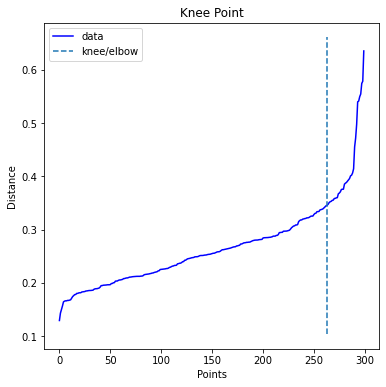

0.34567786876134754


In [23]:
#10) Plot graph knee locater

fig = plt.figure (figsize =(5,5))
knee.plot_knee()
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()
print(distances[knee.knee]) # "just right

Based on the observations from KMeans and DBSCAN, we can conclude that the reading of DBSCAN give better accuracy in terms of clustering which is 0.34 while KMeans give 0.432 in range of (-1,1) which is closer to 0